In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [2]:
pd.read_csv("MH_Labour_Cases_Details.csv")

,Division,Type of cases,Perticulars,2020,2021,2022,2023,2024,2025,Total
0,Chatrapati Sambhajinagar Division,PAMS CASES,Total Complaints,159,181,126,252,390,279,1387
1,Chatrapati Sambhajinagar Division,PAMS CASES,Number of cases settled,22,85,62,58,65,26,318
2,Chatrapati Sambhajinagar Division,PAMS CASES,Financial benefits provided to workers,299741,545093,1403897,1643026,807116,502103,5200976
3,Chatrapati Sambhajinagar Division,PAMS CASES,Number of workers provided with financial bene...,31,20,14,90,38,12,205
4,Chatrapati Sambhajinagar Division,2A CASES,Total Complaints,59,63,88,61,69,43,383
...,...,...,...,...,...,...,...,...,...,...
97,Kokan Division,GD CASES,Total Complaints,12,20,36,49,52,69,238
98,Kokan Division,GD CASES,Cases settled through mediation,1,6,6,5,3,9,30
99,Kokan Division,GD CASES,The financial benefit given to workers,0,0,3307642,2334053,136000,6852000,12629695
100,Kokan Division,GD CASES,Number of unemployed workers,0,0,76,13,109,274,472


In [3]:
df = pd.DataFrame(pd.read_csv("MH_Labour_Cases_Details.csv"))

In [4]:
df.head()

,Division,Type of cases,Perticulars,2020,2021,2022,2023,2024,2025,Total
0,Chatrapati Sambhajinagar Division,PAMS CASES,Total Complaints,159,181,126,252,390,279,1387
1,Chatrapati Sambhajinagar Division,PAMS CASES,Number of cases settled,22,85,62,58,65,26,318
2,Chatrapati Sambhajinagar Division,PAMS CASES,Financial benefits provided to workers,299741,545093,1403897,1643026,807116,502103,5200976
3,Chatrapati Sambhajinagar Division,PAMS CASES,Number of workers provided with financial bene...,31,20,14,90,38,12,205
4,Chatrapati Sambhajinagar Division,2A CASES,Total Complaints,59,63,88,61,69,43,383


In [5]:
df.rename(columns={"Perticulars" : "Particulars"},inplace= True)
df.rename(columns={"Total" : "Total Cases"},inplace= True)

In [6]:
df.head()

,Division,Type of cases,Particulars,2020,2021,2022,2023,2024,2025,Total Cases
0,Chatrapati Sambhajinagar Division,PAMS CASES,Total Complaints,159,181,126,252,390,279,1387
1,Chatrapati Sambhajinagar Division,PAMS CASES,Number of cases settled,22,85,62,58,65,26,318
2,Chatrapati Sambhajinagar Division,PAMS CASES,Financial benefits provided to workers,299741,545093,1403897,1643026,807116,502103,5200976
3,Chatrapati Sambhajinagar Division,PAMS CASES,Number of workers provided with financial bene...,31,20,14,90,38,12,205
4,Chatrapati Sambhajinagar Division,2A CASES,Total Complaints,59,63,88,61,69,43,383


In [7]:
df.to_csv("MH_Labour_Cases_Cleaned.csv", index= False)

Which type of labour case (2A, 2K, PAMS, GD) has the highest total number of complaints across all divisions?

In [8]:
totals = df["Type of cases"].sum()
highest_type =df.loc[df["Total Cases"].idxmax()]
print(totals)
print(highest_type)

PAMS CASESPAMS CASESPAMS CASESPAMS CASES2A CASES2A CASES2A CASES2A CASES2K CASES2K CASES2K CASES2K CASESGD CASESGD CASESGD CASESGD CASESGD CASESPAMS CASESPAMS CASESPAMS CASESPAMS CASES2A CASES2A CASES2A CASES2A CASES2K CASES2K CASES2K CASES2K CASESGD CASESGD CASESGD CASESGD CASESGD CASESPAMS CASESPAMS CASESPAMS CASESPAMS CASES2A CASES2A CASES2A CASES2A CASES2K CASES2K CASES2K CASES2K CASESGD CASESGD CASESGD CASESGD CASESGD CASESPAMS CASESPAMS CASESPAMS CASESPAMS CASES2A CASES2A CASES2A CASES2A CASES2K CASES2K CASES2K CASES2K CASESGD CASESGD CASESGD CASESGD CASESGD CASESPAMS CASESPAMS CASESPAMS CASESPAMS CASES2A CASES2A CASES2A CASES2A CASES2K CASES2K CASES2K CASES2K CASESGD CASESGD CASESGD CASESGD CASESGD CASESPAMS CASESPAMS CASESPAMS CASESPAMS CASES2A CASES2A CASES2A CASES2A CASES2K CASES2K CASES2K CASES2K CASESGD CASESGD CASESGD CASESGD CASESGD CASES
Division                                Nashik Division
Type of cases                                  GD CASES
Particulars      The fi

How have total labour complaints changed over time from 2020 to 2025?

In [23]:
year_cols = ['2020','2021','2022','2023','2024','2025']
total_complaints = (
    df[df["Particulars"]== "Total Complaints"][year_cols]
    .apply(pd.to_numeric, errors = 'coerce')
    .sum()
)
print(total_complaints)

2020    3442.0
2021    4435.0
2022    6605.0
2023    6566.0
2024    6857.0
2025    6172.0
dtype: float64


Which division records the highest number of labourers overall ?

In [10]:
workers_df = df[df["Particulars"]== 'Number of workers provided with financial benefits'].copy()
year_cols = ['2020','2021','2022','2023','2024','2025']

for col in year_cols:
    workers_df[col] = pd.to_numeric(workers_df[col], errors='coerce').fillna(0)

division_workers = (
    workers_df
    .groupby('Division')[year_cols]
    .sum()
    .sum(axis=1)
)

highest_division = division_workers.idxmax()
highest_value = division_workers.max()
print(highest_division)
print(highest_value)

Kokan Division
3491


Are individual disputes(2A cases) more than collective disputes(2K cases)

In [11]:
individual_disputes = df[df["Type of cases"] == "2A"]
collective_disputes = df[df["Type of cases"] == "2K"]
if individual_disputes["Total Cases"].sum() > collective_disputes["Total Cases"].sum():
    print("Yes 2A cases are more than 2K cases")
else :
  print("No 2A cases are not more than 2K cases")

No 2A cases are not more than 2K cases


What proportion of total cases are settled compared to total complaints ?

In [12]:
year_cols = ['2020', '2021', '2022', '2023', '2024', '2025']

complaints_data = df[df['Particulars'] == 'Total Complaints'].copy()
settled_data = df[df['Particulars'] == 'Number of cases settled'].copy()

for col in year_cols:
    complaints_data[col] = pd.to_numeric(complaints_data[col], errors='coerce').fillna(0)
    settled_data[col] = pd.to_numeric(settled_data[col], errors='coerce').fillna(0)

total_complaints = complaints_data[year_cols].sum().sum()
total_settled = settled_data[year_cols].sum().sum()

settlement_rate = total_settled / total_complaints
print(f"Settlement Rate: {settlement_rate:.2%}")

Settlement Rate: 12.44%


How have total labour complaints changed over time from 2020-2025 ?

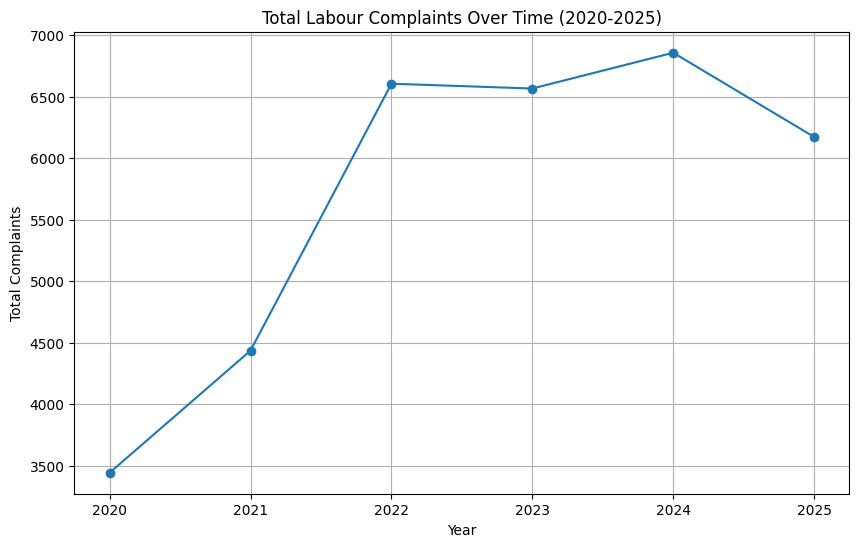

In [13]:
year_cols = ['2020','2021','2022','2023','2024','2025']
complaints_data = df[df["Particulars"] == "Total Complaints"].copy()
for col in year_cols:
    complaints_data[col] = pd.to_numeric(complaints_data[col], errors='coerce').fillna(0)
total_labour_complaints_by_year = complaints_data[year_cols].sum()

plt.figure(figsize=(10, 6))
plt.plot(total_labour_complaints_by_year.index, total_labour_complaints_by_year.values, marker='o', linestyle='-')
plt.title("Total Labour Complaints Over Time (2020-2025)")
plt.xlabel("Year")
plt.ylabel("Total Complaints")
plt.grid(True)
plt.show()

which divisions record the highest number of complaints ?

Division
Pune Division                        12947.0
Kokan Division                       12778.0
Nashik Division                       2929.0
Nagpur Division                       2278.0
Chatrapati Sambhajinagar Division     1874.0
Amarawati Division                    1271.0
dtype: float64


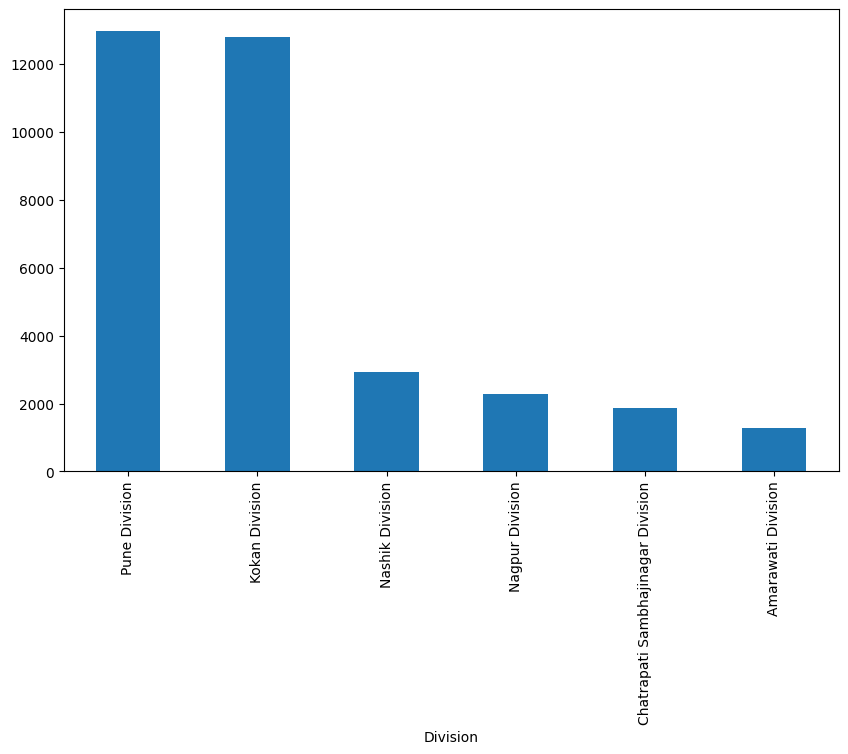

In [19]:
year_cols = ['2020','2021','2022','2023','2024','2025']

complaints_for_division_sum = df[df['Particulars'] == 'Total Complaints'].copy()
for col in year_cols:
    complaints_for_division_sum[col] = pd.to_numeric(complaints_for_division_sum[col], errors='coerce').fillna(0)

division_complaints = (
    complaints_for_division_sum
    .groupby("Division")[year_cols]
    .sum()
    .sum(axis=1)
    .sort_values(ascending = False)
)
print(division_complaints)
visualisations = division_complaints.plot(kind="bar", figsize = (10,6))

How does the settlement rate vary across each case types?

    Case_Type  Settlement_Rate
0    2A CASES         0.000000
1    2K CASES         0.000000
2    GD CASES         0.000000
3  PAMS CASES         0.165076


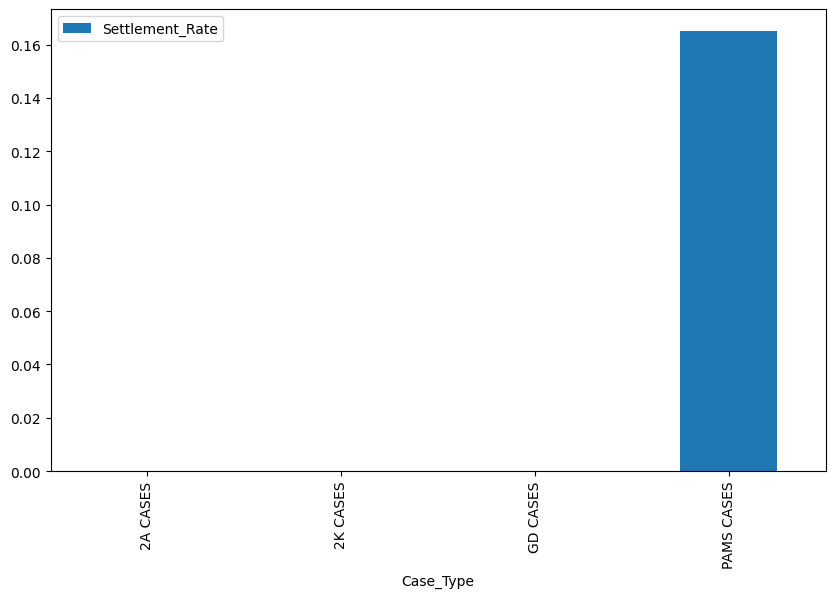

In [16]:
year_cols = ['2020', '2021', '2022', '2023', '2024', '2025']
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
complaints = (
    df[df['Particulars'] == 'Total Complaints']
    .groupby('Type of cases')[year_cols]
    .sum()
    .sum(axis=1)
)
settled = (
    df[df['Particulars'] == 'Number of cases settled']
    .groupby('Type of cases')[year_cols]
    .sum()
    .sum(axis=1)
    .reindex(complaints.index, fill_value=0)
)

settlement_rate_by_type = (
    settled / complaints
).fillna(0).reset_index()

settlement_rate_by_type.columns = ['Case_Type', 'Settlement_Rate']

print(settlement_rate_by_type)

visualizations = settlement_rate_by_type.plot(kind="bar", x="Case_Type", y="Settlement_Rate", figsize=(10, 6))
#Settlement rates vary significantly across case types, with PAMS cases
#showing measurable settlements, while other case types report zero settlement
#rates due to the absence of recorded settlement data.

What is the distribution of the labour type cases?

Type of cases
2A CASES       7146.0
2K CASES        824.0
GD CASES        434.0
PAMS CASES    25673.0
dtype: float64


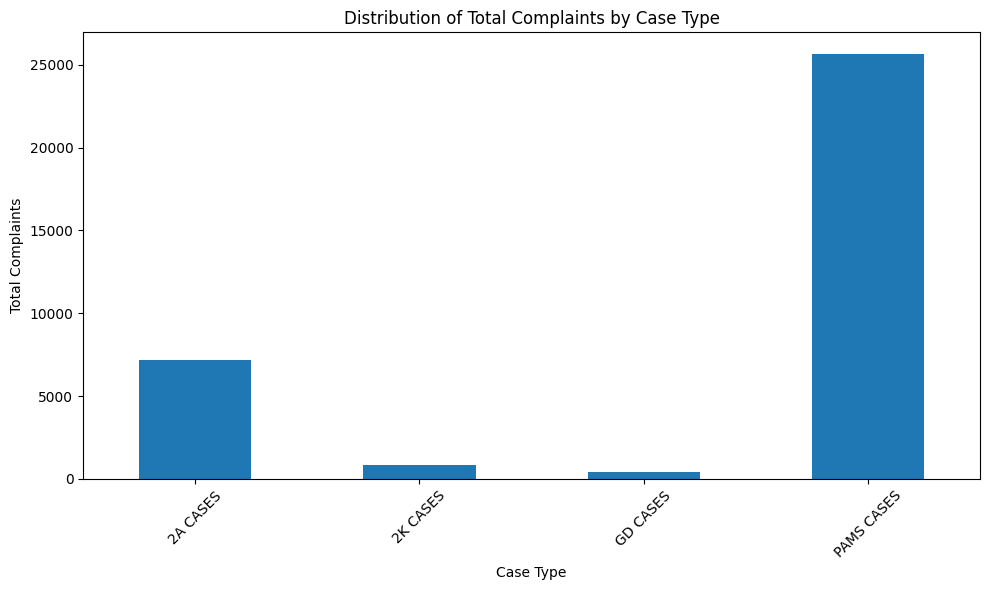

In [17]:
year_cols = ['2020', '2021', '2022', '2023', '2024', '2025']
complaints_df = df[df["Particulars"] == "Total Complaints"].copy()
for col in year_cols:
    complaints_df[col] = pd.to_numeric(complaints_df[col], errors='coerce').fillna(0)

case_type_distribution = (
    complaints_df
    .groupby("Type of cases")[year_cols]
    .sum()
    .sum(axis=1)
)
print(case_type_distribution)

visualizations = case_type_distribution.plot(kind="bar", figsize=(10, 6))
plt.title('Distribution of Total Complaints by Case Type')
plt.xlabel('Case Type')
plt.ylabel('Total Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

How has the comparison of labour disputes changed over time ?

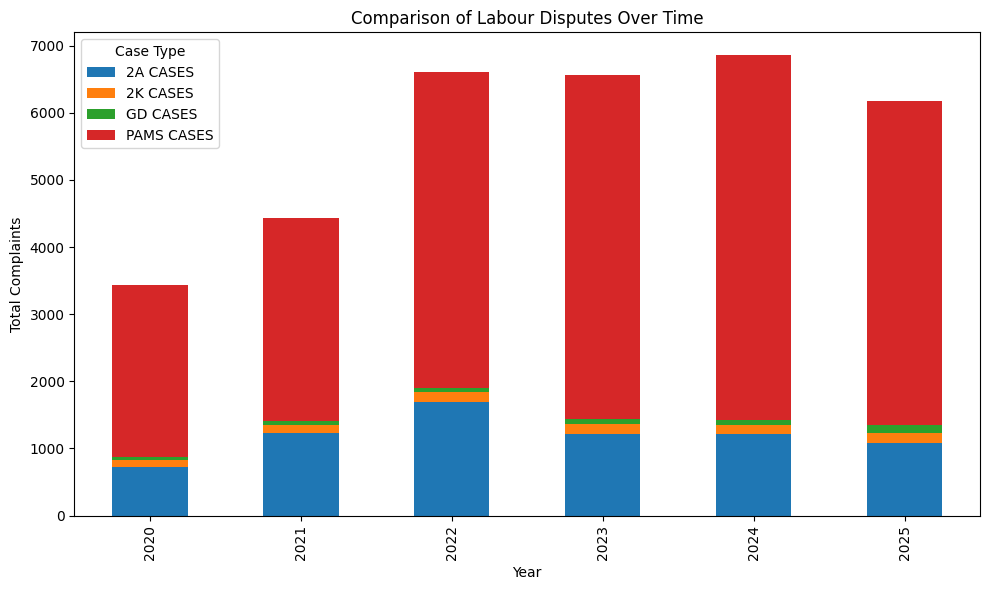

In [18]:
year_cols = ['2020', '2021', '2022', '2023', '2024', '2025']

labour_complaints_df = df[df["Particulars"] == "Total Complaints"].copy()

for col in year_cols:
    labour_complaints_df[col] = pd.to_numeric(labour_complaints_df[col], errors='coerce').fillna(0)

labour_cases = (
    labour_complaints_df
    .groupby("Type of cases")[year_cols]
    .sum()
)

labour_cases.T.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel("Year")
plt.ylabel("Total Complaints")
plt.title("Comparison of Labour Disputes Over Time")
plt.legend(title="Case Type")
plt.tight_layout()
plt.show()